## Authentication


In [32]:
!pip install praw

In [6]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="E78X-XUFhnol0vSgeRjySQ",
    client_secret="b9yBpBh8YbqSy9YhmFe5Ox6EqpKbqg",
    user_agent=user_agent
)

In [7]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

The "bitcoin" subreddit channel will be use for this project

In [8]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
1bg5lv0
BitcoinFan7
1710594154.0
95
0.95
https://www.reddit.com/r/Bitcoin/comments/1bg5lv0/bitcoin_newcomers_faq_please_read/
0


Get total comment in Subreddit

In [9]:
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

652


In [10]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,I'm just starting out in bitcoin and I am tryi...
1,Happy Halving everyone
2,🎉LIVE Bitcoin Halving Countdown 2024 | Join th...
3,Watch the Blocks Fill & Drop
4,"Where have tech, philosophical, improvement pr..."


In [18]:
bitcoin_df.columns

Index(['Titles'], dtype='object')

In [19]:
bitcoin_df.columns = ['Titles']

In [20]:
bitcoin_df.head()

,Titles
0,I'm just starting out in bitcoin and I am tryi...
1,Happy Halving everyone
2,🎉LIVE Bitcoin Halving Countdown 2024 | Join th...
3,Watch the Blocks Fill & Drop
4,"Where have tech, philosophical, improvement pr..."


In [21]:
bitcoin_df.Titles.duplicated().sum() 

0

In [22]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,I'm just starting out in bitcoin and I am tryi...
1,Happy Halving everyone
2,🎉LIVE Bitcoin Halving Countdown 2024 | Join th...
3,Watch the Blocks Fill & Drop
4,"Where have tech, philosophical, improvement pr..."


In [23]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)
#Show the clean text
bitcoin_df.head()

,Titles
0,I'm just starting out in bitcoin and I am tryi...
1,Happy Halving everyone
2,LIVE Bitcoin Halving Countdown 2024 | Join the...
3,Watch the Blocks Fill & Drop
4,"Where have tech, philosophical, improvement pr..."


In [24]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   ----- ---------------------------------- 92.2/626.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/626.3 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 4.9 MB/s eta 0:00:00


In [25]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [26]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,I'm just starting out in bitcoin and I am tryi...,0.233333,0.112121
1,Happy Halving everyone,1.000000,0.800000
2,LIVE Bitcoin Halving Countdown 2024 | Join the...,0.500000,0.153409
3,Watch the Blocks Fill & Drop,0.000000,0.000000
4,"Where have tech, philosophical, improvement pr...",0.000000,0.000000


In [27]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,I'm just starting out in bitcoin and I am tryi...,0.233333,0.112121,Positive
1,Happy Halving everyone,1.000000,0.800000,Positive
2,LIVE Bitcoin Halving Countdown 2024 | Join the...,0.500000,0.153409,Positive
3,Watch the Blocks Fill & Drop,0.000000,0.000000,Neutral
4,"Where have tech, philosophical, improvement pr...",0.000000,0.000000,Neutral
5,btcrecover blockchain bitcoin wallet compatibi...,0.000000,0.000000,Neutral
6,3 Things I've Learnt About Bitcoin,0.000000,0.000000,Neutral
7,Whatever Bitcoin you owned before this moment ...,0.541667,-0.291667,Negative
8,halving day celebrations....,0.000000,0.000000,Neutral
9,"I just released ""Awning"" A dockerized Bitcoin ...",0.000000,0.000000,Neutral


## Data Visualization

In [28]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

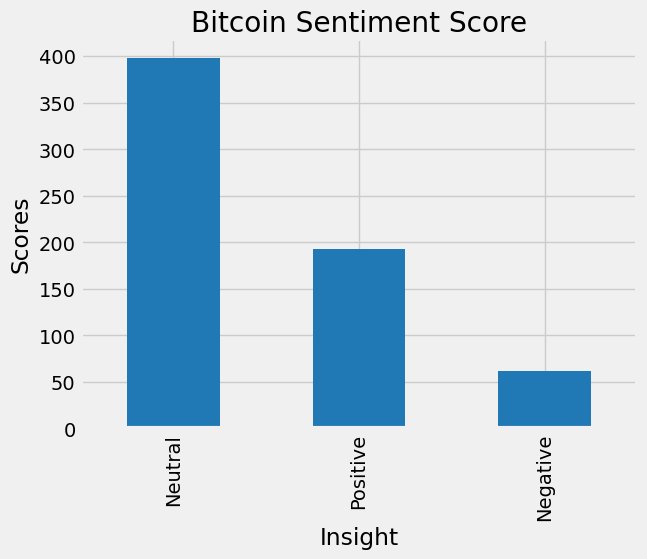

In [29]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Wordcloud

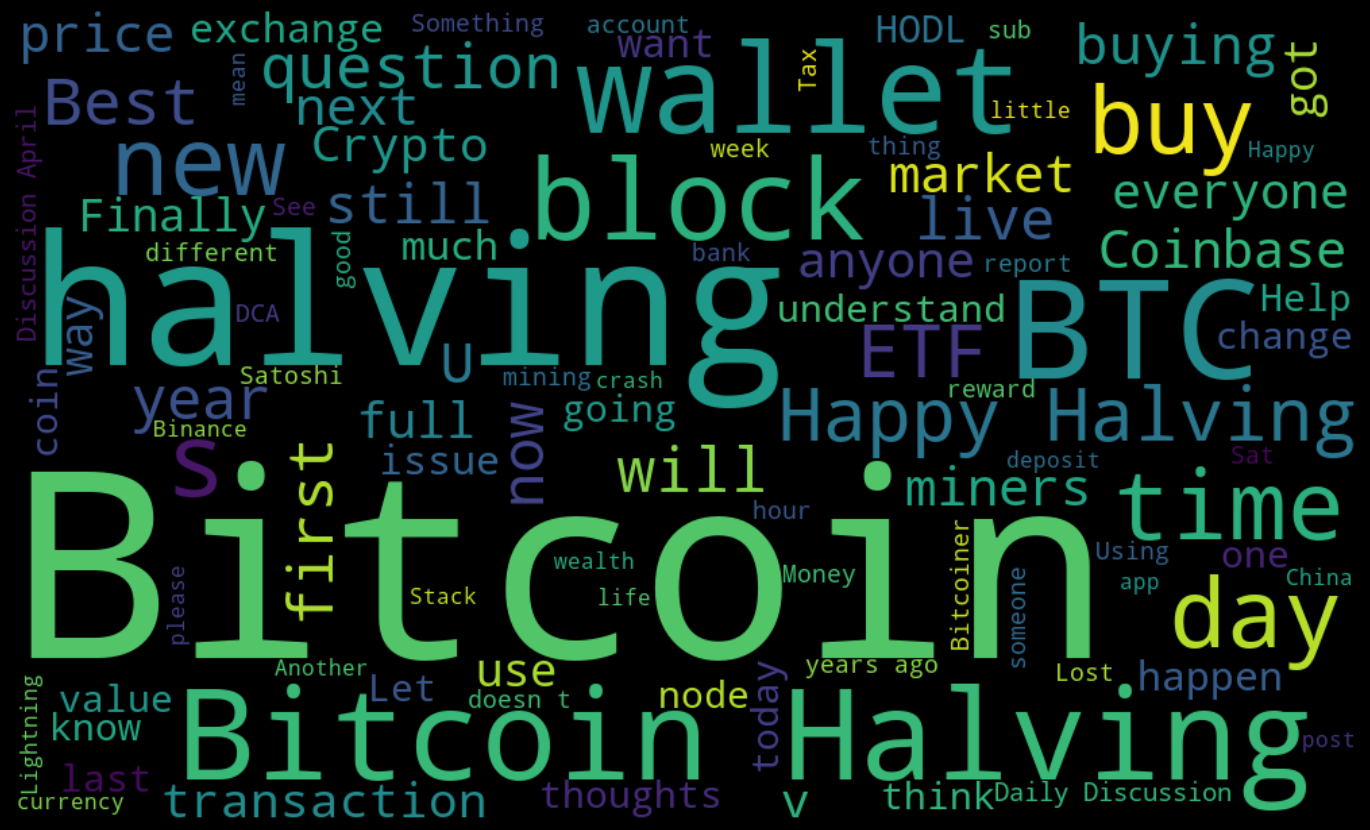

In [30]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");